### Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.fft import fft2, fftshift, ifft2, ifftshift

## Step 1: Governing Equations of 2D Discrete Fourier Transform (DFT)

To analyze the frequency components of an image \( I(x, y) \), we use the **2D Discrete Fourier Transform** (DFT). This transformation converts an image from the **spatial domain** to the **frequency domain**.

The **forward 2D DFT** is defined as:

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} I(x, y) \cdot e^{-j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

Where:
- $ I(x, y) $: input image in spatial domain
- $ F(u, v)$ : frequency-domain representation
- $ M \times N $: dimensions of the image
- $ u, v $: frequency indices

---

The **inverse 2D DFT** (to reconstruct the image from the frequency domain) is given by:

$$I(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) \cdot e^{j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

These equations are fundamental to image processing tasks such as filtering, frequency mixing, and compression.


## Step 2: Compute & Visualize the 2D DFT

In this step, we:

1. Load a grayscale image (`cat_gray.jpg`) and resize it to 512×512.  
2. Compute its 2D Discrete Fourier Transform (DFT) via `fft2`.  
3. Extract the **magnitude spectrum** (linear) and convert to **dB scale** using  
   $$
     20\log_{10}\bigl(\lvert F(u,v)\rvert + \epsilon\bigr)
   $$
4. Plot side by side:  
   - Original image  
   - Magnitude spectrum (linear)  
   - Magnitude spectrum (dB, centered)  


#### Taking the images as input

In [2]:
#image of cat
img_path1 = './EE200_practical_programming/cat_gray.jpg'
img1 = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (512, 512))

#imge of dog
img_path2 = './EE200_practical_programming/dog_gray.jpg'
img2 = cv2.imread(img_path2, cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (512, 512))

### Fourier Transform of Images

In [3]:
F1 = fft2(img1)
F2 = fft2(img2)

mag1 = np.abs(F1)
mag2 = np.abs(F2)

mag_vis1 = (mag1 - mag1.min()) / (mag1.max() - mag1.min())
print("min, max of mag1 =", mag1.min(), mag1.max())

mag_vis2 = (mag2 - mag2.min()) / (mag2.max() - mag2.min())
print("min, max of mag2 =", mag2.min(), mag2.max())

mag_db1 = 20 * np.log10(mag1 + 1e-5)
print("min, max of mag_db1 =", mag_db1.min(), mag_db1.max())
mag_db2 = 20 * np.log10(mag2 + 1e-5)
print("min, max of mag_db2 =", mag_db2.min(), mag_db2.max())


min, max of mag1 = 1.0511566489970838 37424656.0
min, max of mag2 = 1.0 32359897.0
min, max of mag_db1 = 0.43343146618808776 151.46315634169977
min, max of mag_db2 = 8.685846208963275e-05 150.2001426120813


## Step 3: Plotting the Magnitude Spectra

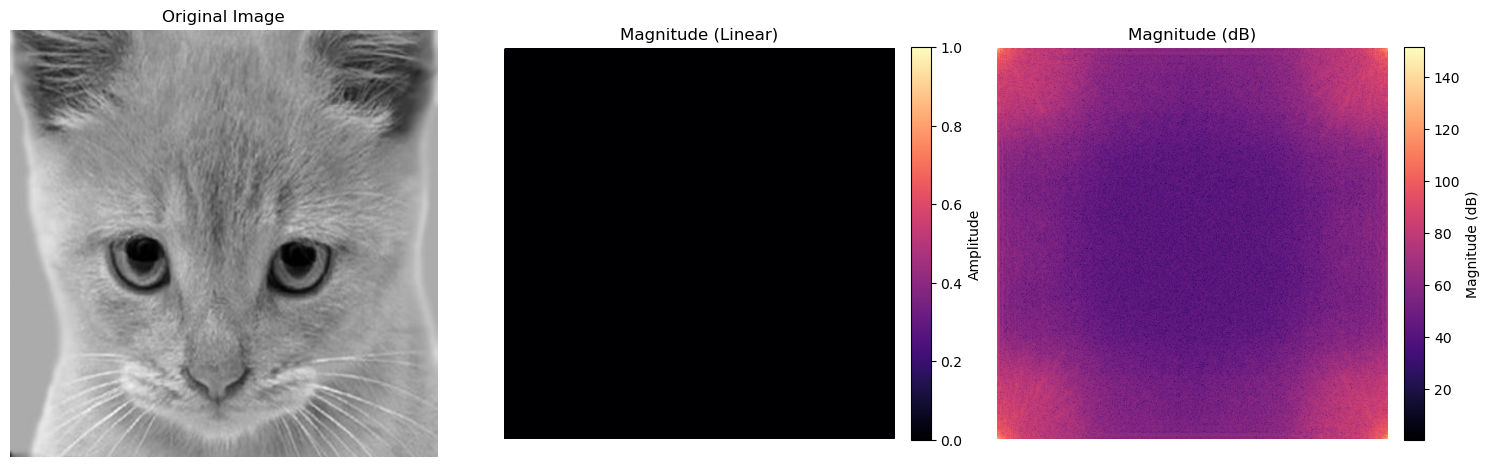

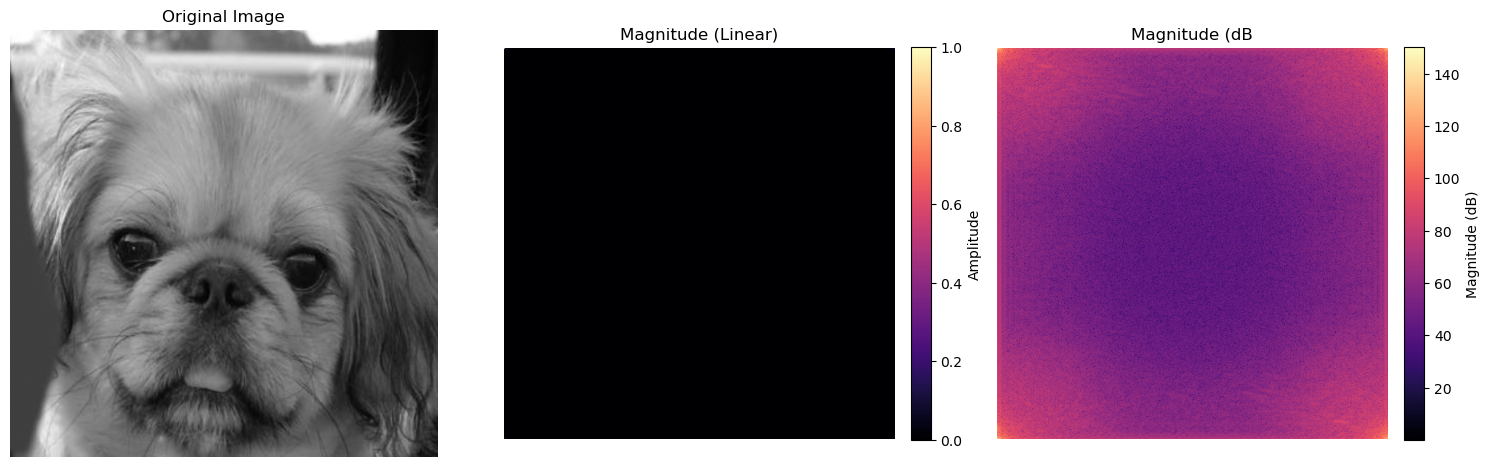

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
im1 = plt.imshow(mag_vis1, cmap='magma')
plt.title('Magnitude (Linear)')
plt.axis('off')
plt.colorbar(im1, fraction=0.046, pad=0.04, label='Amplitude')

plt.subplot(1, 3, 3)
im2 = plt.imshow(mag_db1, cmap='magma')
plt.title('Magnitude (dB)')
plt.axis('off')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
im1 = plt.imshow(mag_vis2, cmap='magma')
plt.title('Magnitude (Linear)')
plt.axis('off')
plt.colorbar(im1, fraction=0.046, pad=0.04, label='Amplitude')

plt.subplot(1, 3, 3)
im2 = plt.imshow(mag_db2, cmap='magma')
plt.title('Magnitude (dB')
plt.axis('off')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.tight_layout()
plt.show()


### Clipping the normalised Linear Magnitude Spectra to enhance visibility

Clipping magnitude at T = 3.12e+04
max of mag = 37424656.0
ratio of T to max =  0.0008338226906267274


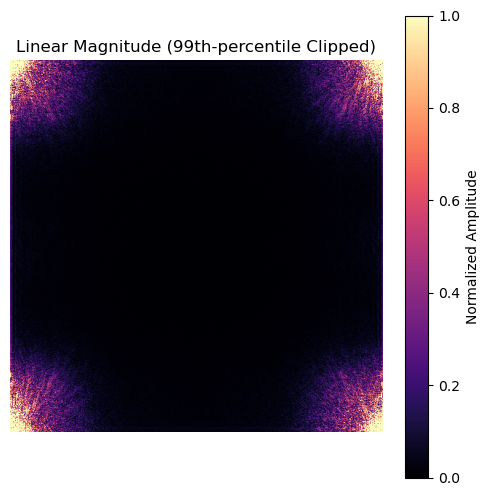

In [5]:
F = (fft2(img1))
mag = np.abs(F)

T = np.percentile(mag, 99)
print(f"Clipping magnitude at T = {T:.2e}")
print("max of mag =", mag.max())
print("ratio of T to max = ", T / mag.max())
mag_clipped = np.minimum(mag, T)

mag_vis = (mag_clipped - mag_clipped.min()) / (mag_clipped.max() - mag_clipped.min())
plt.figure(figsize=(6,6))
im = plt.imshow(mag_vis, cmap='magma', vmin=0, vmax=1)
plt.title('Linear Magnitude (99th-percentile Clipped)')
plt.axis('off')
plt.colorbar(im, label='Normalized Amplitude')
plt.show()



### Difference in Magnitude Spectra in dB of both images

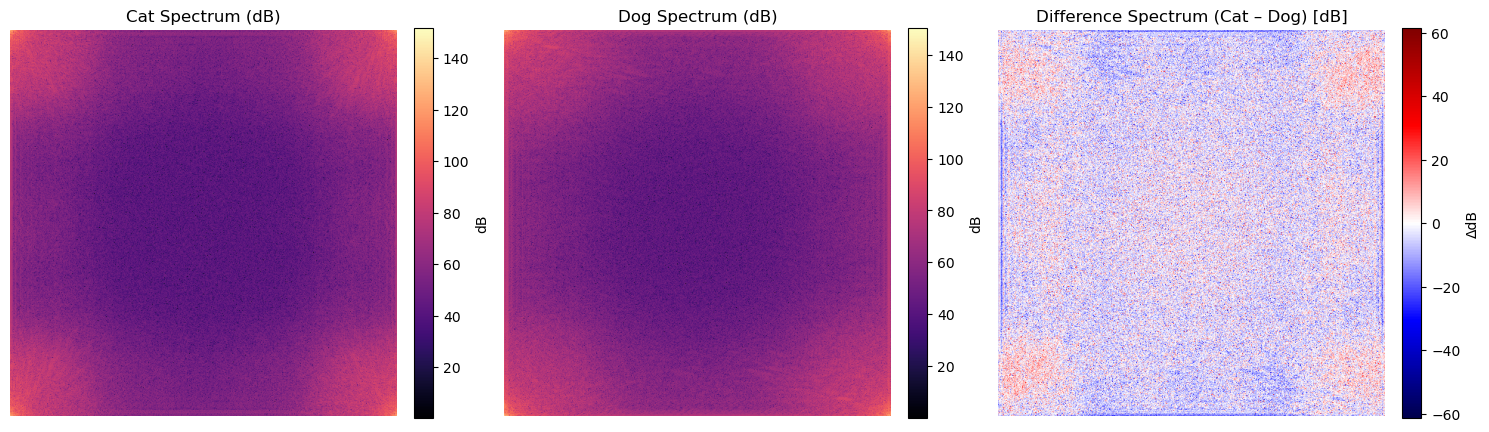

In [6]:
F1 = (fft2(img1))
F2 = (fft2(img2))

mag_cat = np.abs(F1)
mag_dog = np.abs(F2)

mag1_db = 20 * np.log10(np.abs(F1) + 1e-5)
mag2_db = 20 * np.log10(np.abs(F2) + 1e-5)

diff_db = mag1_db - mag2_db

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
im1 = plt.imshow(mag1_db, cmap='magma')
plt.title('Cat Spectrum (dB)')
plt.axis('off')
plt.colorbar(im1, fraction=0.046, pad=0.04, label='dB')

plt.subplot(1, 3, 2)
im2 = plt.imshow(mag2_db, cmap='magma')
plt.title('Dog Spectrum (dB)')
plt.axis('off')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='dB')

plt.subplot(1, 3, 3)
im3 = plt.imshow(diff_db, cmap='seismic', vmin=-np.max(np.abs(diff_db)), vmax=np.max(np.abs(diff_db)))
plt.title('Difference Spectrum (Cat – Dog) [dB]')
plt.axis('off')
plt.colorbar(im3, fraction=0.046, pad=0.04, label='ΔdB')

plt.tight_layout()
plt.show()


## Step 4: Spectrum Centre

**Where is this spectrum centered?**

- In the **unshifted** 2D FFT magnitude plot, the **DC (zero-frequency) component** and other low-frequency coefficients appear at the **corners** of the array (most prominently at the top-left position, index (0,0)).

**Can you shift it to make lower frequencies located at the center?**

- Yes. By performing a **quadrant swap** (often implemented as `fftshift`), you rearrange the four quadrants of the transform so that the DC and low-frequency components move from the corners into the **geometric center** of the plot. After this shift, points near the center correspond to low spatial frequencies (coarse image structure), and points toward the edges correspond to high spatial frequencies (fine detail).

### Shifting the Centre of Spectra

In [7]:
F1 = fftshift(fft2(img1))
F2 = fftshift(fft2(img2))

mag1 = np.abs(F1)
mag2 = np.abs(F2)

mag_vis1 = (mag1 - mag1.min()) / (mag1.max() - mag1.min())
print("min, max of mag1 =", mag1.min(), mag1.max())

mag_vis2 = (mag2 - mag2.min()) / (mag2.max() - mag2.min())
print("min, max of mag2 =", mag2.min(), mag2.max())

mag_db1 = 20 * np.log10(mag1 + 1e-5)
print("min, max of mag_db1 =", mag_db1.min(), mag_db1.max())
mag_db2 = 20 * np.log10(mag2 + 1e-5)
print("min, max of mag_db2 =", mag_db2.min(), mag_db2.max())

min, max of mag1 = 1.0511566489970838 37424656.0
min, max of mag2 = 1.0 32359897.0
min, max of mag_db1 = 0.43343146618808776 151.46315634169977
min, max of mag_db2 = 8.685846208963275e-05 150.2001426120813


### Plotting the Shifted Spectra

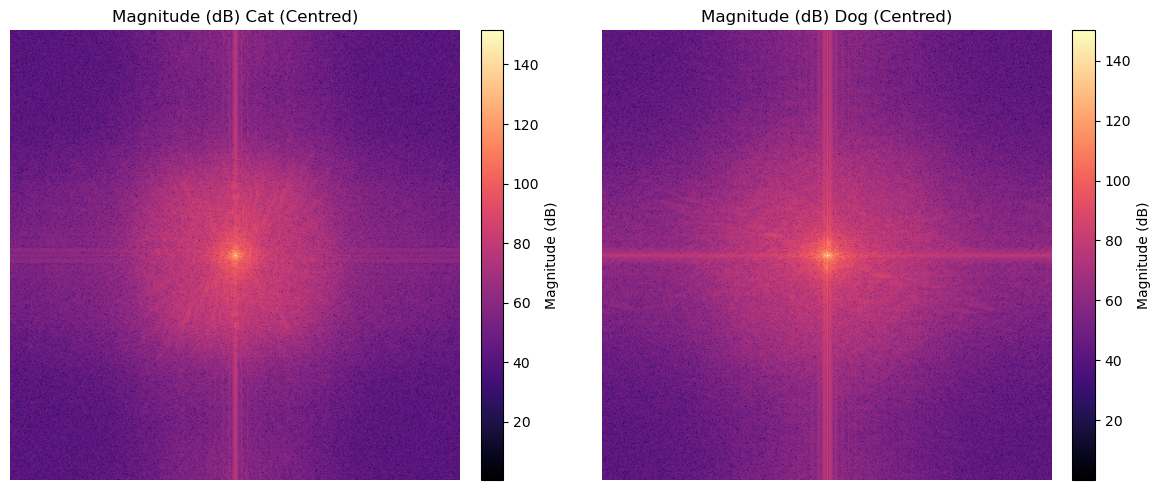

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
im2 = plt.imshow(mag_db1, cmap='magma')
plt.title('Magnitude (dB) Cat (Centred)')
plt.axis('off')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.subplot(1, 2, 2)
im2 = plt.imshow(mag_db2, cmap='magma')
plt.title('Magnitude (dB) Dog (Centred)')
plt.axis('off')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.tight_layout()
plt.show()


## Step 5: Rotating the images

In [9]:
# rotate the image by 90 degrees counterclockwise
img_rot = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)

F_orig = fftshift(fft2(img1))
F_rot  = fftshift(fft2(img_rot))

mag_orig_db = 20 * np.log10(np.abs(F_orig) + 1e-5)
mag_rot_db  = 20 * np.log10(np.abs(F_rot)  + 1e-5)

# Rotate the dB magnitude of the rotated image by 90 degrees clockwise
mag_rot_db_rot = np.rot90(mag_rot_db, k=1)

# difference in dB when both images are centered ans same oriented
diff_db = mag_orig_db - mag_rot_db_rot

### Plotting the magnitude spectrum

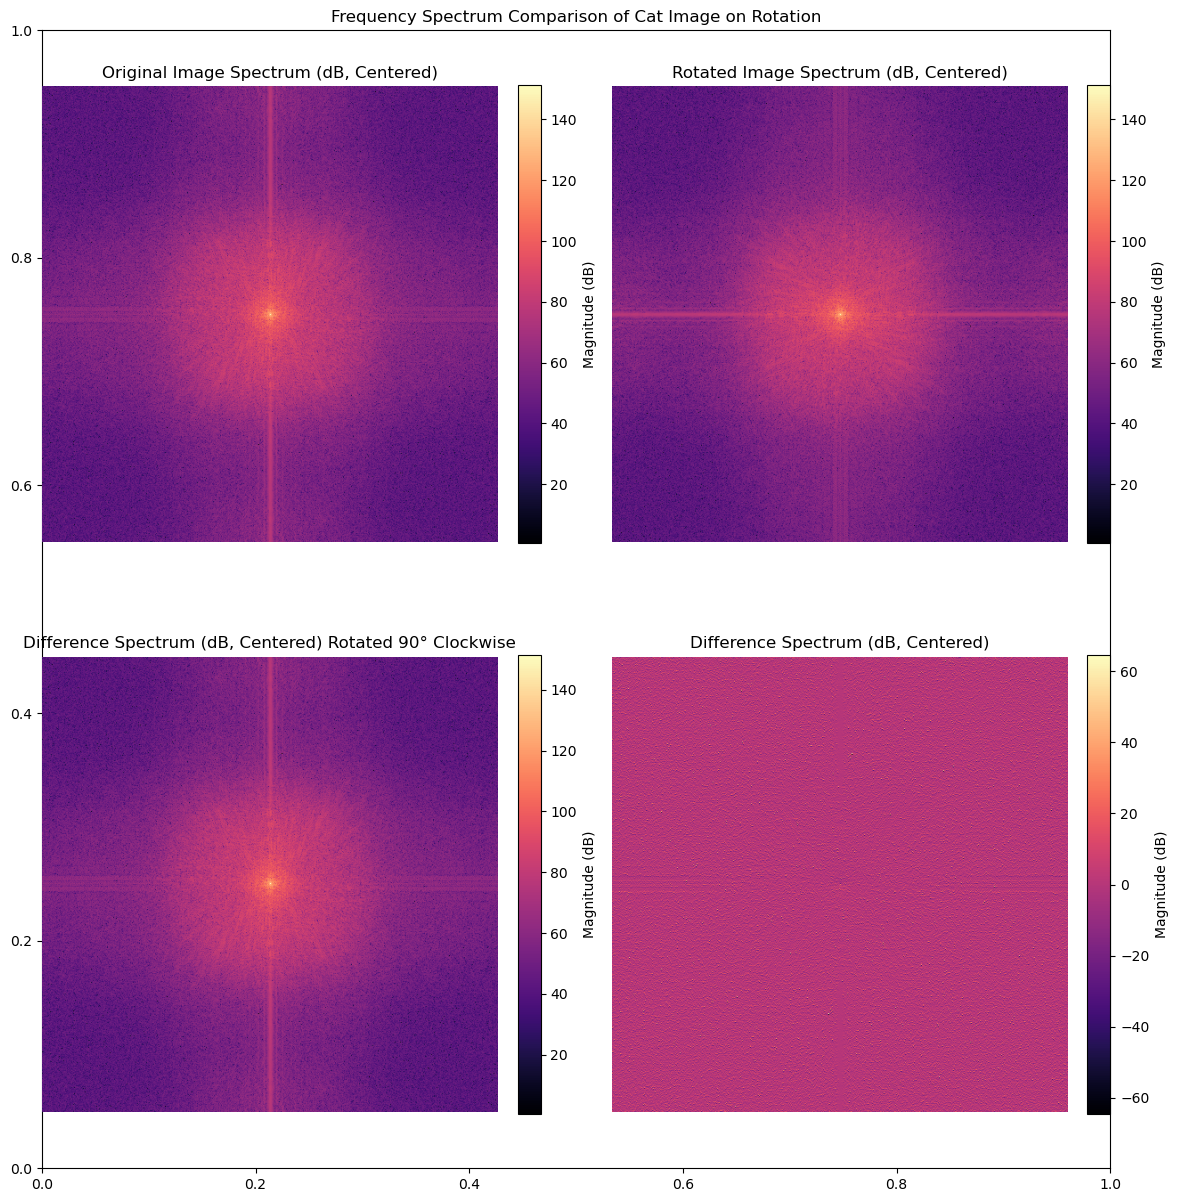

In [10]:
plt.figure(figsize=(12,12))
plt.title('Frequency Spectrum Comparison of Cat Image on Rotation')

plt.subplot(2,2,1)
plt.imshow(mag_orig_db, cmap='magma')
plt.title('Original Image Spectrum (dB, Centered)')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.subplot(2,2,2)
plt.imshow(mag_rot_db, cmap='magma')
plt.title('Rotated Image Spectrum (dB, Centered)')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.subplot(2,2,3)
plt.imshow(mag_rot_db_rot, cmap='magma')
plt.title('Difference Spectrum (dB, Centered) Rotated 90° Clockwise')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.subplot(2,2,4)
plt.imshow(diff_db, cmap='magma')
plt.title('Difference Spectrum (dB, Centered)')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04, label='Magnitude (dB)')

plt.tight_layout()
plt.show()

### Observations

- **Identical Spectral Shape**  
  The overall pattern of the magnitude spectrum (bright central region with concentric rings or lobes) is preserved after rotation.

- **90° Rotation Match**  
  Every feature in the frequency-domain plot of the rotated image appears rotated by exactly 90° compared to the original spectrum.

- **Spatial–Frequency Correspondence**  
  This confirms that a **90° counter-clockwise rotation** in the spatial domain produces an **exact 90° counter-clockwise rotation** in the frequency domain, without altering magnitudes.


## Step 5: Frequency Mixer Design

**Objective:**  
Fuse two images so that one contributes **high-frequency details** (edges, textures) and the other contributes **low-frequency structure** (smooth shapes, gradients).

**System Design:**  
1. **Compute 2D FFTs** of both images and center them (`fftshift`).  
2. **Design Transfer Functions** in the frequency domain:  
   - **Low-Pass Mask** $H_{\text{LP}}(u,v)$: a binary circular mask of radius \(R\) around the center.  
   - **High-Pass Mask** $H_{\text{HP}}(u,v) = 1 - H_{\text{LP}}(u,v)$.  
3. **Transfer Function Plots:** visualize both \(H_{\text{LP}}\) and \(H_{\text{HP}}\).  
4. **Filtering & Fusion:**  
   - Apply $H_{\text{HP}}$ to the high-detail image’s spectrum.  
   - Apply $H_{\text{LP}}$ to the low-structure image’s spectrum.  
   - Sum the two masked spectra.  
5. **Reconstruction:** perform the inverse FFT (`ifft2`, `ifftshift`) and take magnitude to get the fused image.

The resulting image shows **coarse structure** (from the low-pass image) when viewed from afar, and **fine details** (from the high-pass image) upon close inspection—demonstrating perceptual frequency mixing.


### Creating the mask for Fusing the images

In [11]:
#Spatial‐domain blur of the low‐detail image
sigma_spatial = 6
ksize = int(4*sigma_spatial//1+1)
blurred_low = cv2.GaussianBlur(img2, (ksize, ksize), sigma_spatial)

#fourier transform of the images
F_high = fftshift(fft2(img1))
F_low  = fftshift(fft2(blurred_low))

# Create ideal high/low‐pass masks
rows, cols = img1.shape
crow, ccol = rows//2, cols//2
R_freq = 13

mask_lp = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(mask_lp, (ccol, crow), R_freq, 1.0, thickness=-1)
mask_hp = 1.0 - mask_lp

F_mix = F_high * mask_hp * 0.7 + F_low * mask_lp 
fused = np.abs(ifft2(ifftshift(F_mix)))

### Plotting the images

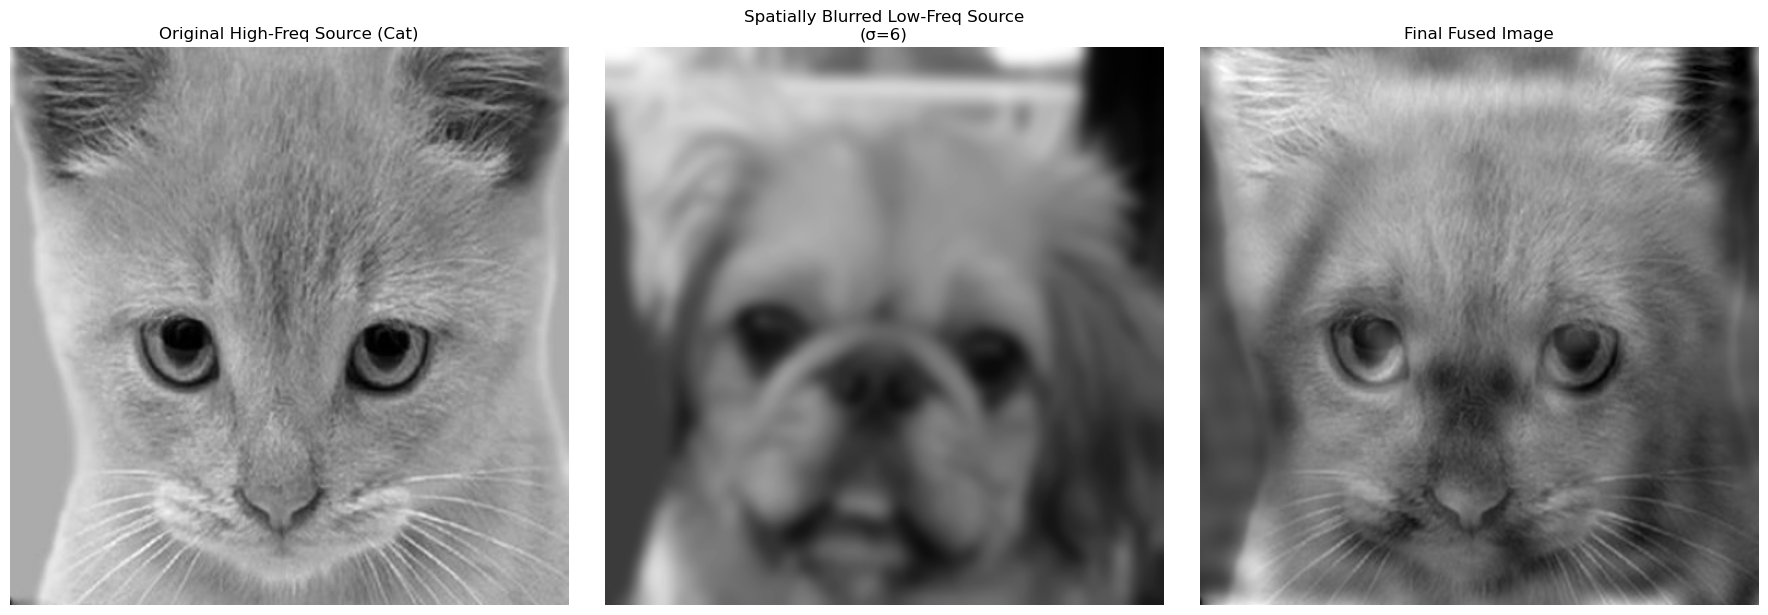

In [12]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.title('Original High‐Freq Source (Cat)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blurred_low, cmap='gray')
plt.title(f'Spatially Blurred Low‐Freq Source\n(σ={sigma_spatial})')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(fused, cmap='gray')
plt.title('Final Fused Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
#saving the fuesed image
# cv2.imwrite('fused_image.png', fused)

### Masks used for mixing

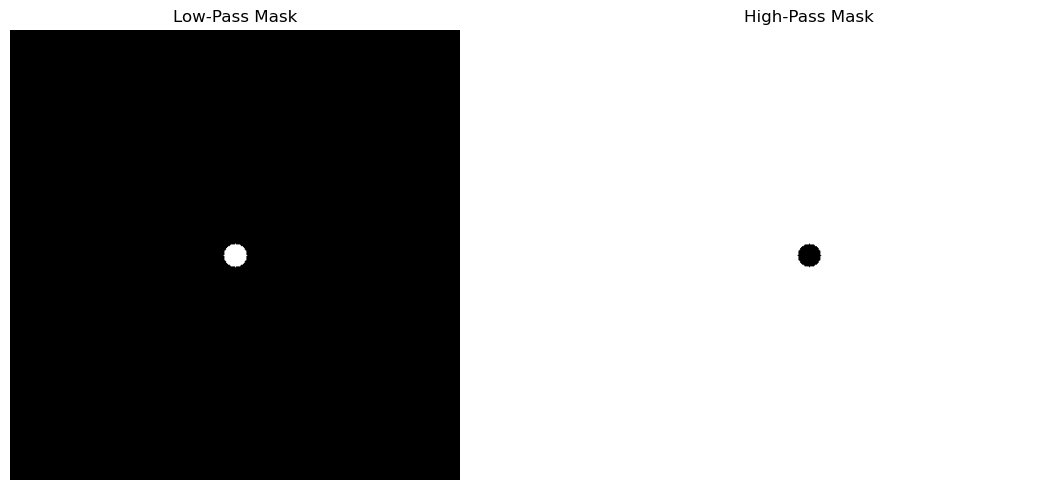

In [14]:
H, W = 512, 512

radius = 13

# Create coordinate grid
Y, X = np.ogrid[:H, :W]
center = (H // 2, W // 2)
distance = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

# Create masks
low_pass_mask = (distance <= radius).astype(np.float32)
high_pass_mask = 1 - low_pass_mask

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(low_pass_mask, cmap='gray')
plt.title('Low-Pass Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_mask, cmap='gray')
plt.title('High-Pass Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


### Result of FFT due to masks

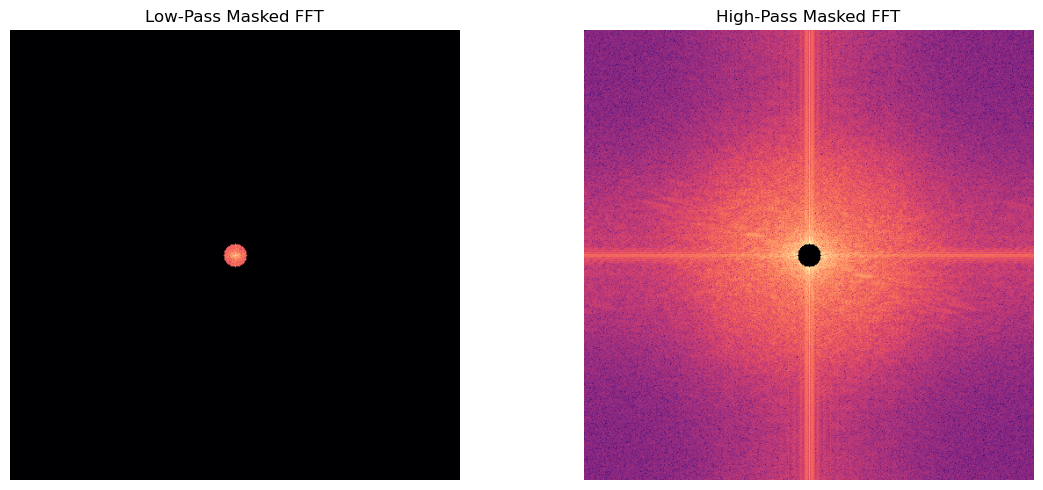

In [15]:
f = fft2(img2)
fshift = fftshift(f)
magnitude = np.abs(fshift)

# Mask generation
radius = 13
Y, X = np.ogrid[:H, :W]
center = (H // 2, W // 2)
distance = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
low_pass_mask = (distance <= radius).astype(np.float32)
high_pass_mask = 1 - low_pass_mask

# Apply masks in frequency domain
f_low = fshift * low_pass_mask
f_high = fshift * high_pass_mask

# Compute magnitude spectra of masked outputs
mag_low = np.log1p(np.abs(f_low))
mag_high = np.log1p(np.abs(f_high))

# Plot all in one figure
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(mag_low, cmap='magma')
plt.title("Low-Pass Masked FFT")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mag_high, cmap='magma')
plt.title("High-Pass Masked FFT")
plt.axis('off')

plt.tight_layout()
# plt.savefig("masked_fft_visuals.png")
plt.show()
